In [4]:
# Import required libraries
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt




In [5]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)


In [6]:

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()


In [7]:

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data1 = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data2 = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [24]:
# Replace this with the path to your image
image = Image.open("/content/scissors/0zoQAmDFXehOZsAp.png").convert("RGB")
image1 = Image.open("/content/paper/0Uomd0HvOB33m47I.png").convert("RGB")
image2 = Image.open("/content/rock/0NDYNEoDui7o64gU.png").convert("RGB")

In [25]:
# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image1 = ImageOps.fit(image1, size, Image.Resampling.LANCZOS)
image2 = ImageOps.fit(image2, size, Image.Resampling.LANCZOS)

In [26]:
# turn the image into a numpy array
image_array = np.asarray(image)
image_array1 = np.asarray(image1)
image_array2 = np.asarray(image2)

In [27]:
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
normalized_image_array1 = (image_array1.astype(np.float32) / 127.5) - 1
normalized_image_array2 = (image_array2.astype(np.float32) / 127.5) - 1

In [28]:
# Load the image into the array
data[0] = normalized_image_array
data1[0] = normalized_image_array1
data2[0] = normalized_image_array2

In [29]:
# Predict the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

prediction1 = model.predict(data1)
index1 = np.argmax(prediction1)
class_name1 = class_names[index1]
confidence_score1 = prediction1[0][index1]

prediction2 = model.predict(data2)
index2 = np.argmax(prediction2)
class_name2 = class_names[index2]
confidence_score2 = prediction1[0][index2]



1/1 [==============================] - 0s 44ms/step


In [30]:
# Print prediction and confidence score
print(image)
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)




<PIL.Image.Image image mode=RGB size=224x224 at 0x7CC42AE1D1B0>
Class: Scissors
Confidence Score: 1.0


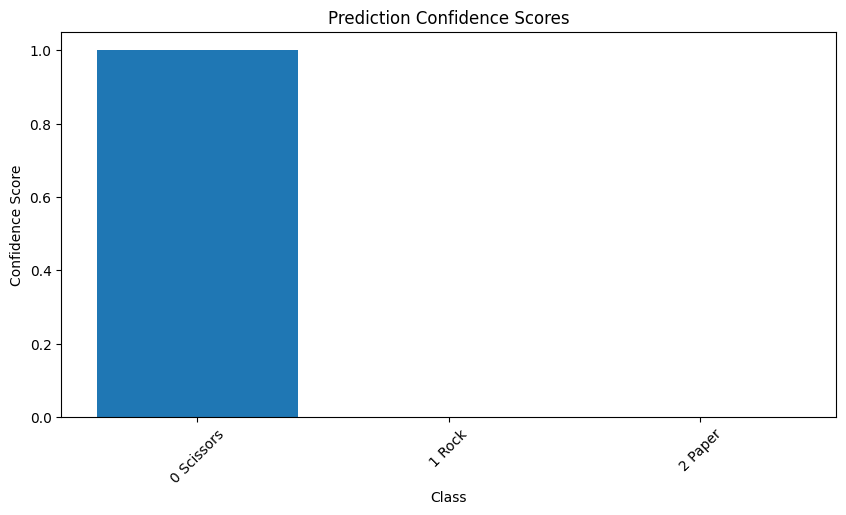

In [31]:
# Visualization
# Create a bar plot for the prediction probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(len(class_names)), prediction[0], tick_label=[name.strip() for name in class_names])
plt.xlabel('Class')
plt.ylabel('Confidence Score')
plt.title('Prediction Confidence Scores')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Print prediction and confidence score
print("Class 1:", class_name1[2:], end="")
print("Confidence Score 1:", confidence_score1)

Class 1: Paper
Confidence Score 1: 1.0


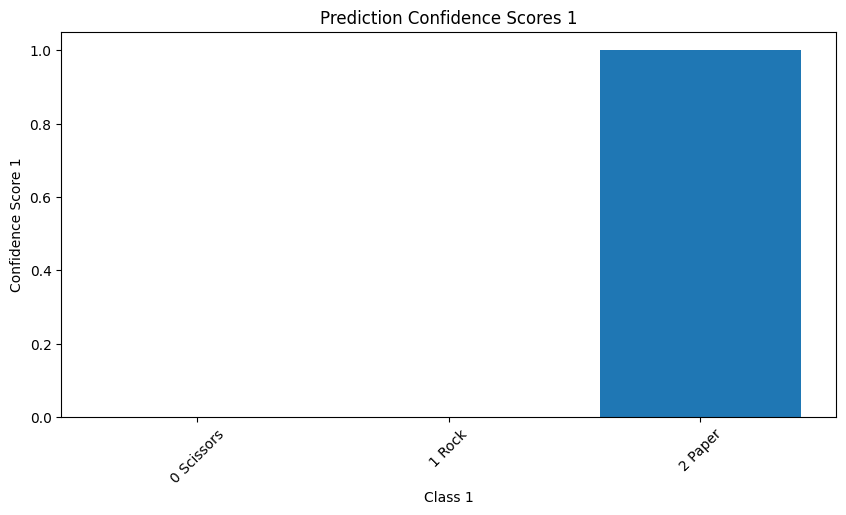

In [33]:
# Visualization
# Create a bar plot for the prediction probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(len(class_names)), prediction1[0], tick_label=[name.strip() for name in class_names])
plt.xlabel('Class 1')
plt.ylabel('Confidence Score 1')
plt.title('Prediction Confidence Scores 1')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Print prediction and confidence score
print("Class 2:", class_name2[2:], end="")
print("Confidence Score 2:", confidence_score2)

Class 2: Rock
Confidence Score 2: 6.675651e-10


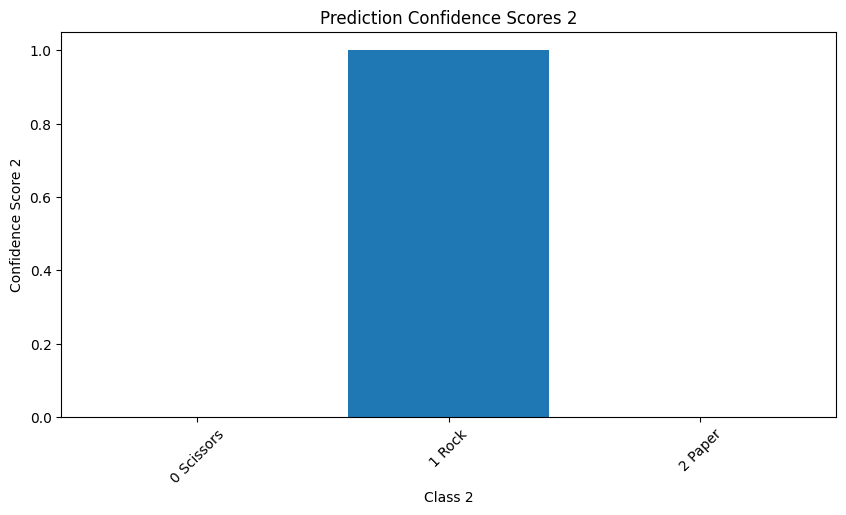

In [35]:
# Visualization
# Create a bar plot for the prediction probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(len(class_names)), prediction2[0], tick_label=[name.strip() for name in class_names])
plt.xlabel('Class 2')
plt.ylabel('Confidence Score 2')
plt.title('Prediction Confidence Scores 2')
plt.xticks(rotation=45)
plt.show()